<a href="https://colab.research.google.com/github/JessicaKintner/introPhysics-notebooks/blob/main/plot1DmotionGraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Plots of 1D motion**

###by Jessica Kintner
last updated 9/26/2023

(I first wrote this for an Intro Physics class full of people who had varying levels of Python.  Including no python at all.)

### Here are some sample plots just to show you a way to plot using Python.  

You absolutely do not have to use this if you already have something you like to use.  I just wanted to show plots in class, and I figured I'd share it for those who are interested.

The first plot I just do everything "by hand," and then I write a function and use that for all the test of the plots.

The function also has an option to save the plots to your computer (not google drive), but I think I have that turned off for most of the funciton calls.  It's on for the first plot so you can see how it works.  You can just cancel the dialog window that pops up if you don't want to save anything.

The plot saving feature above is one of the things that probably only works in Colab.  So if anyone downloads this to use with their own Anaconda Jupyter Notebook, you'll have to edit this.

##Warning
You must run the cells in order.


In [ ]:
#import libraries

#for plotting and math
import matplotlib.pyplot as plt
import numpy as np

# to allow download pics of figures
from google.colab import files

###setting some plot style parameters

In [ ]:
#set up my plotting style:
# This is a very particular style that you do not have to use.
# It's fairly exaggerated (I was making the plots to share in class,
# so, they needed to be very visible.)

#turn on grid
plt.rc('axes', grid=True, titlesize= 16, titleweight='bold', labelsize=14)

#axis label font larger
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

#style grid
plt.rc('grid', color='#666666', linestyle='solid', linewidth='0.5')

#ditch the box around plot
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = False

#make the lines extra dark to show up when I shrink them
plt.rc('lines', linewidth=3)


## Example 1:  Flat position vs time graph


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

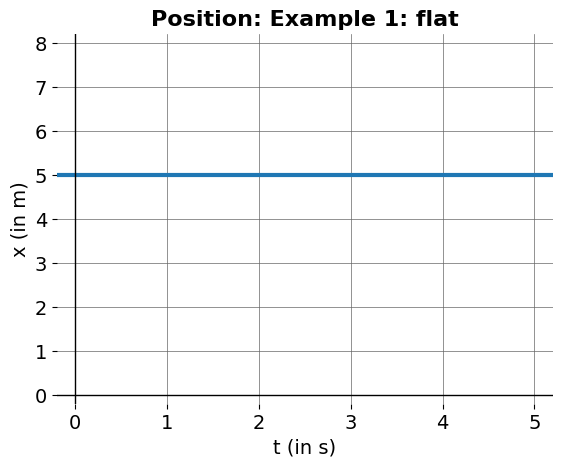

In [ ]:
#create a figure to hold the plotting objects, then start a plot

fig = plt.figure()
ax = plt.axes()

#set the timescale
t = np.linspace(-10, 10, 1000)

#the position function
# I really want x = 5, but python needs x to be an array of same length as t
# (see case 2 below for an easier-to-understand function)

x = 5* np.ones(len(t))

ax.plot(t, x)

plt.title("Position: Example 1: flat")

plt.xlim(-0.2, 5.2)
plt.ylim(-0.2, 8.2);

plt.xlabel("t (in s)")
plt.ylabel("x (in m)")

#plt.grid(b=True, which='major', color='#666666', linestyle='-', linewidth='0.5')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# essentially move the axes to the zeros
plt.axhline(linewidth=1, color='k')
plt.axvline(linewidth=1, color='black')

# to download/save fig
plt.savefig("ex1.png")
files.download("ex1.png")

plt.show()

#from google.colab import files


##Create a function for all that plot stuff

In [ ]:
def oneD_plot_function(t, x, writePlot = False, myTitle = "Position vs time", vertAx="x (in m)"):
  #t and x should be arrays
  # numpy, pyplot, google drive must have been imported

  plt.plot(t,x)

  #set plot limits offset from curve
  t_offset = 0.025*( t.max()-t.min() )
  t_lower = t.min() - t_offset
  t_upper = t.max() + t_offset

  #set plot limits offset from curve
  x_offset = 0.025*( x.max()-x.min() )

  x_lower = x.min() - x_offset
  x_upper = x.max() + x_offset

  if x_offset == 0:
    x_offset = 0.025 * (x.max() - 0)
    x_lower = 0 - x_offset
    x_upper = x.max() + 10*x_offset

  plt.xlim(t_lower, t_upper)
  plt.ylim(x_lower, x_upper);

#  if vertAx == "velocity":
#   myYlabel = "v (in m/s)"
#  else:
#    myYlabel = "x (in m)"

  myYlabel = vertAx;

  plt.title(myTitle)

  plt.xlabel("t (in s)")
  plt.ylabel(myYlabel)

  # essentially move the axes to the zeros
  plt.axhline(linewidth=2, color='k')
  plt.axvline(linewidth=2, color='black')

  if writePlot == True:
    plt.savefig("ex4.png")
    files.download("ex4.png")

  plt.show()


## Example 2:  Linear (not flat) position vs time graph

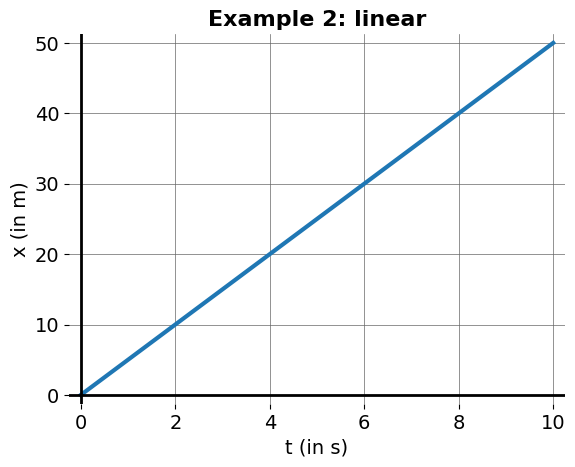

In [ ]:
#set the timescale
t = np.linspace(0, 10, 1000)

#the position function
x = 5*t;

oneD_plot_function(t, x, myTitle="Example 2: linear")

## Example 3:  Quadratic position vs time graph

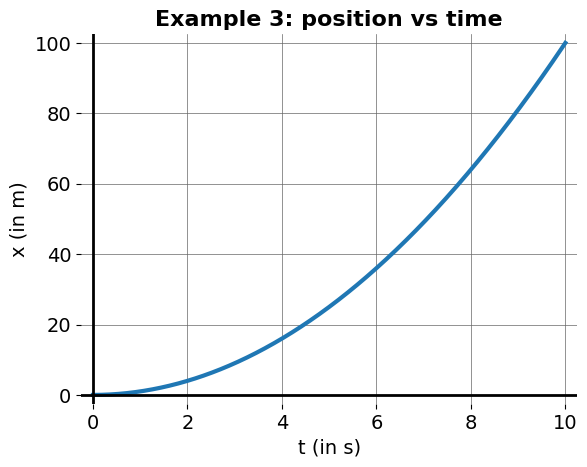

In [ ]:
#the position function
x = t**2;

oneD_plot_function(t, x, myTitle="Example 3: position vs time")


## Example 4:  Mixed bag

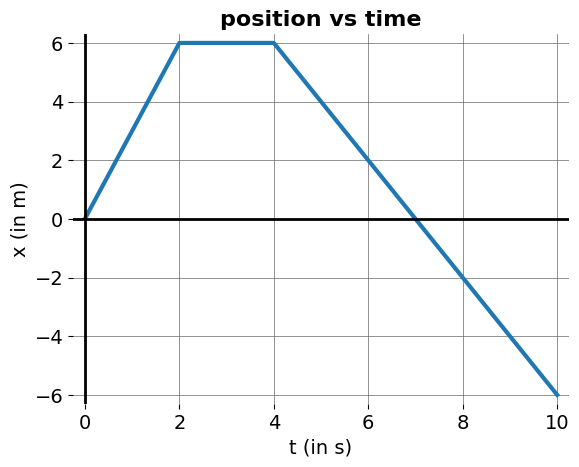

In [ ]:
#set the timescale
t = np.linspace(0, 10, 1000)

x = 6*np.ones(len(t))

for i in range(len(t)):
  #print(t[i])
  if t[i]<2:
    x[i] = 3*t[i]
  elif t[i]>4:
    x[i] = 14 - 2*t[i]

oneD_plot_function(t, x, myTitle="position vs time", vertAx="x (in m)")


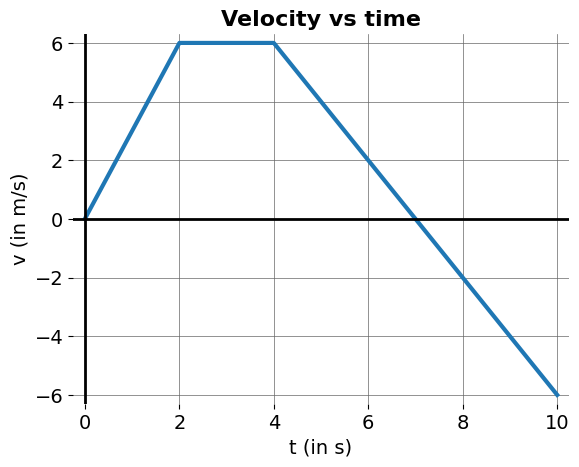

In [ ]:
oneD_plot_function(t, x, myTitle="Velocity vs time", vertAx="v (in m/s)")

###Example 6: a sine wave

In python, $\pi$ is `np.pi`

I'll find time in terms of angular frequency, $\omega$

$$\omega = 2\pi f = \frac{2\pi}{T}$$

I can solve this for the period, $T$

$$ T = \frac{2\pi}{\omega} $$

(np is short for the main python math library called numpy.  The fact that you have to import it is one downside to python (it's not really a scientific language.  However, ease of learning possibly makes up for that.  Plus cool Jupyter Notebooks.)

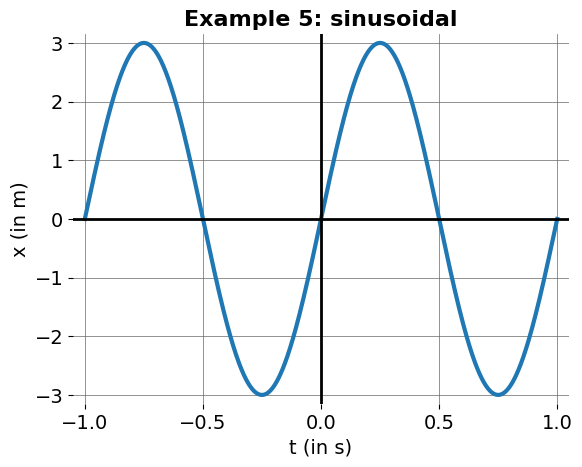

In [ ]:
w = 2*np.pi # given omega = 2 pi (which means T = 1s)

T = 2*np.pi/w

t = np.linspace(-T, T, 1000) # t is an array of time values from -T to T

x = 3*np.sin(w*t)

oneD_plot_function(t, x, myTitle="Example 5: sinusoidal")

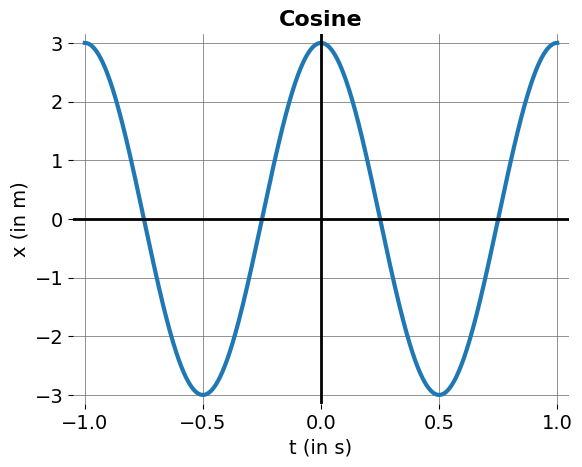

In [ ]:
# let's try the cosine

x = 3*np.cos(w*t)

oneD_plot_function(t, x, myTitle="Cosine")

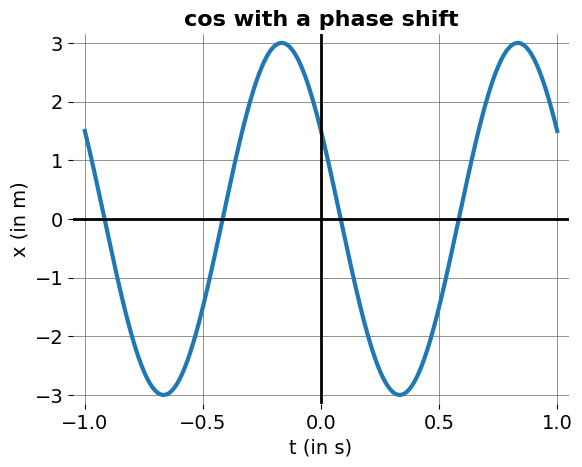

In [ ]:
# starting somewhere in between a sin or cos

delta = np.pi/3

x = 3*np.cos(w*t + delta)

oneD_plot_function(t, x, myTitle="cos with a phase shift")

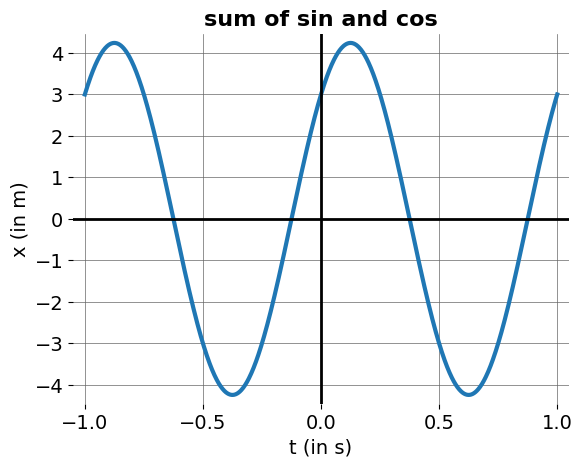

In [ ]:
# another way to write it

x = 3*np.sin(w*t) + 3*np.cos(w*t)

oneD_plot_function(t, x, myTitle="sum of sin and cos")


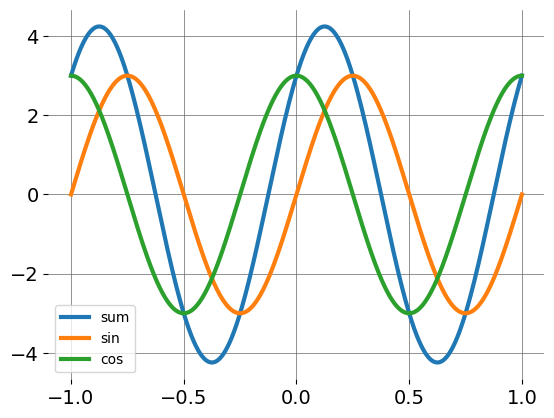

In [ ]:
# to see pieces and sum of last plot

plt.plot(t, x, label = "sum")
plt.plot(t, 3*np.sin(w*t), label = "sin")
plt.plot(t, 3*np.cos(w*t), label = "cos")
plt.legend()
plt.show()